In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

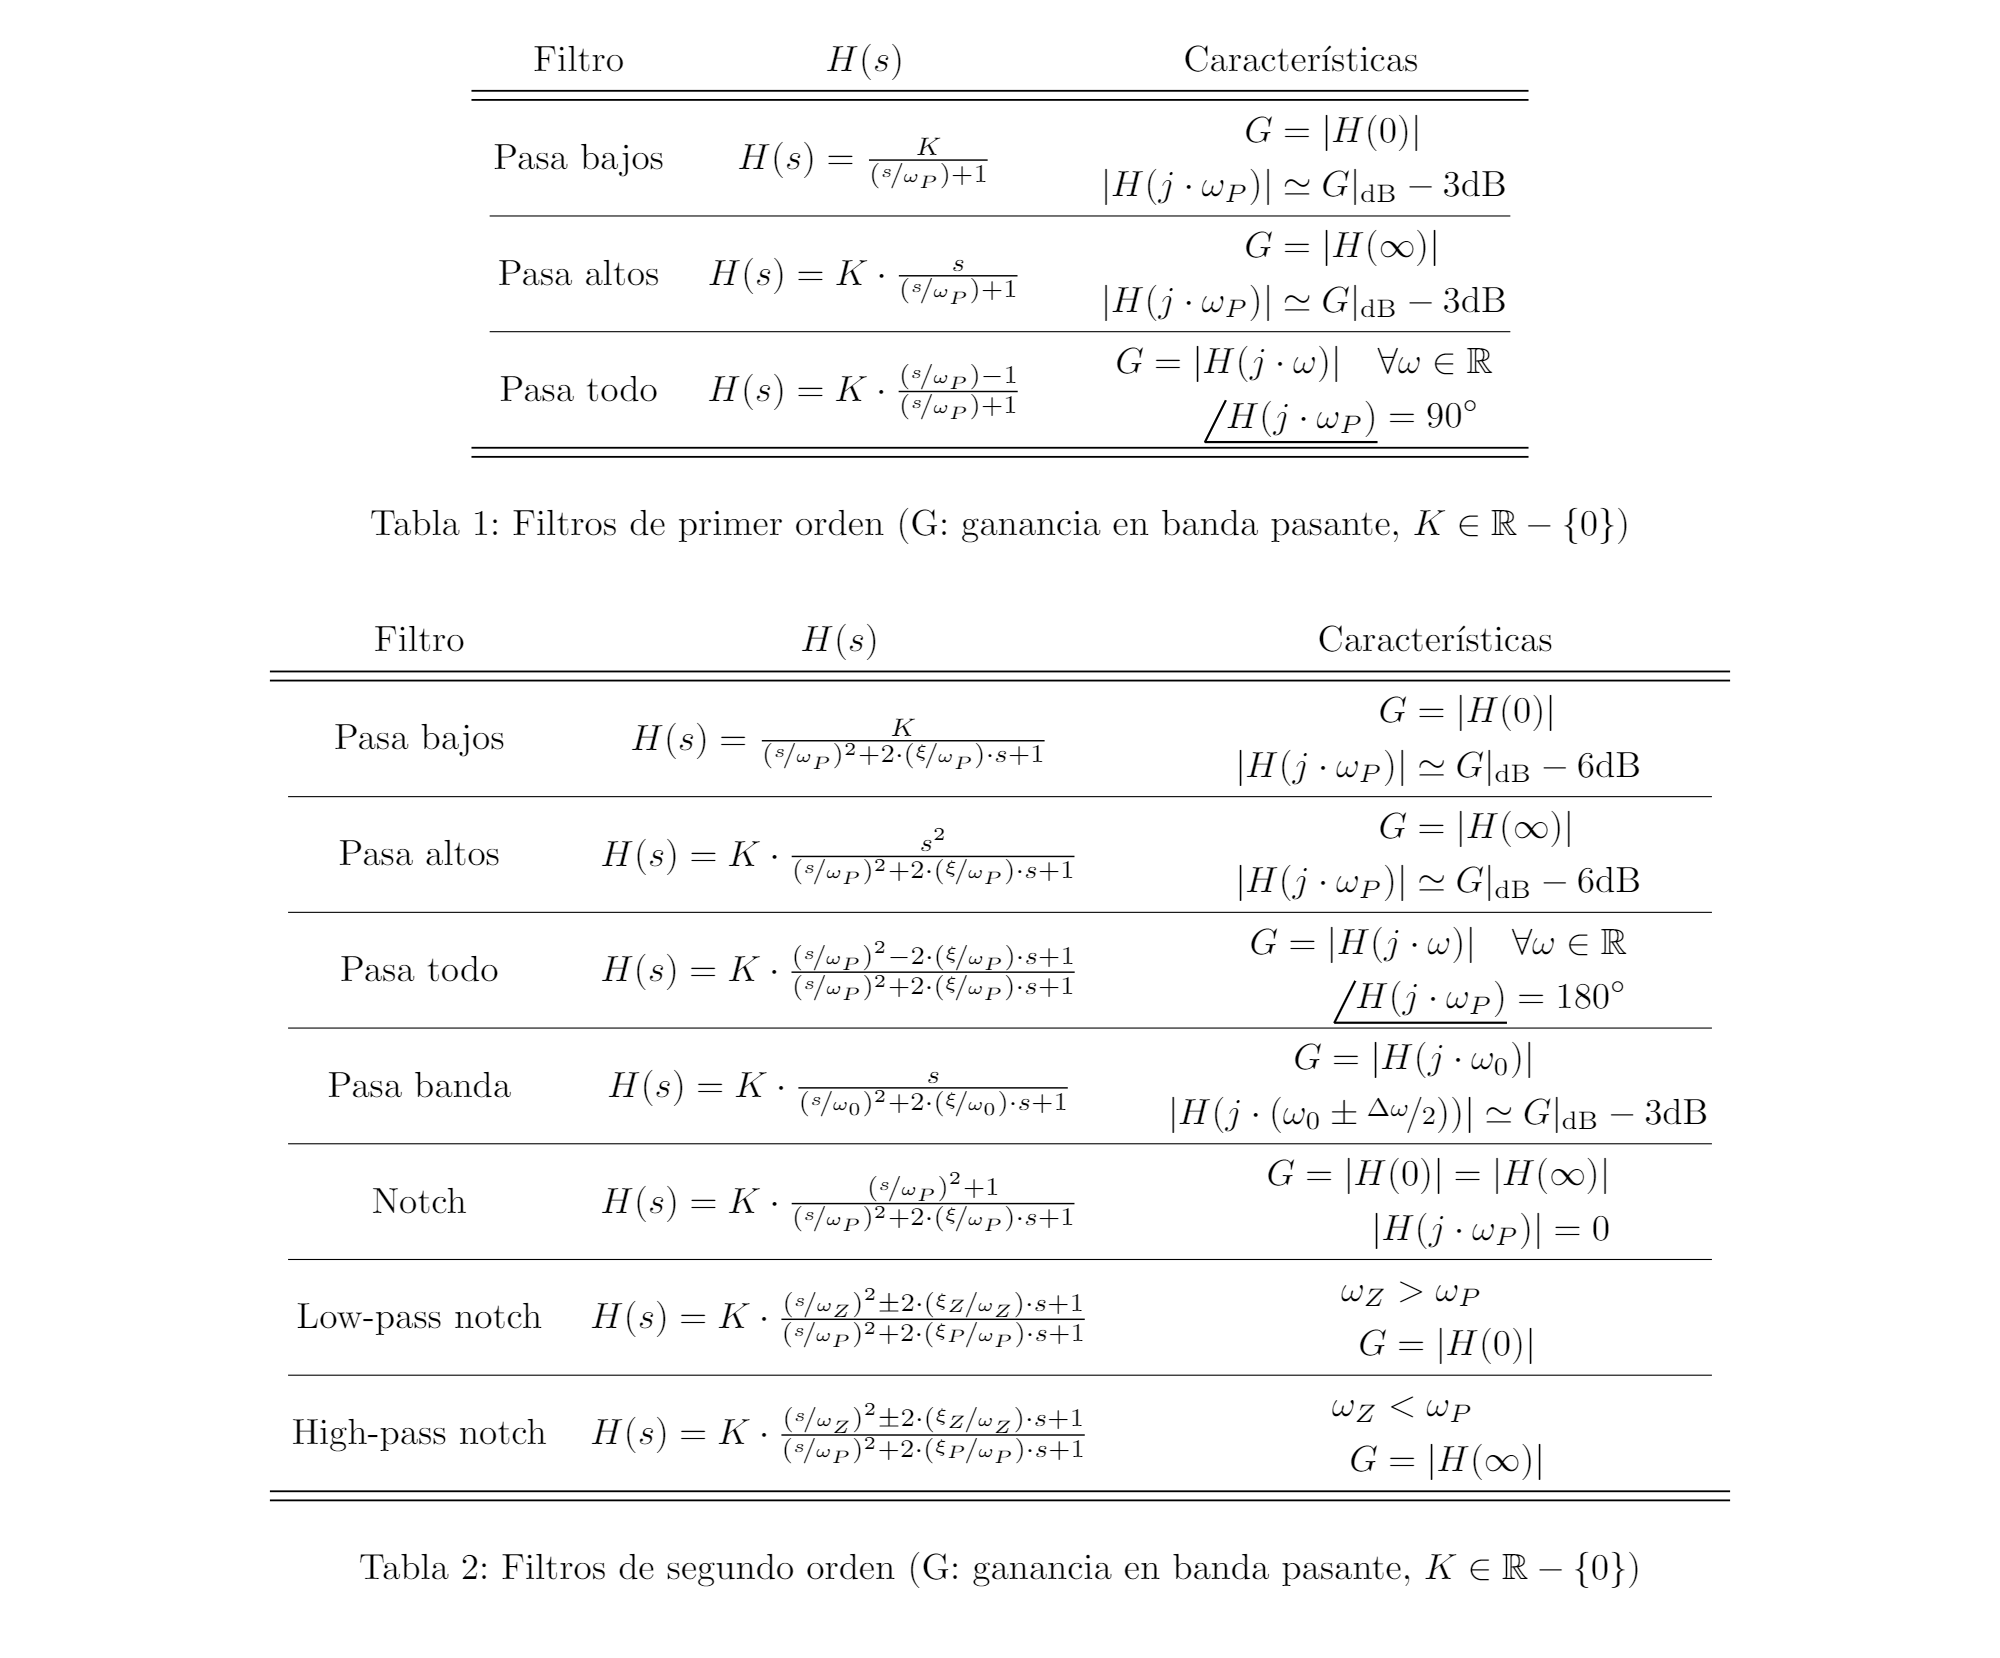

In [ ]:
def plot_bode(w, y):
    plt.figure()
    plt.semilogx(w, y)
    plt.grid()
    plt.tight_layout()
    plt.show()
    return

#1 Order Filters
def low_pass_1 (wo, wp):
    num = [0, 10, 100]           # a $ + b
    den = [0, 1, 100]

    sys = signal.TransferFunction(num, den)
    w, Hdb, phi = signal.bode(sys)

    plot_bode(w, Hdb)
    plot_bode(w, phi)

    return  

def high_pass_1 (k, wp):
    num = [0, k, 0]
    den = [0, wp, 0]

    sys = signal.TransferFunction(num, den)
    w, Hdb, phi = signal.bode(sys)

    plot_bode(w, Hdb)
    plot_bode(w, phi)

    return

def all_pass_1(k, wp):
    num = [0, k/wp, -k]
    den = [0, wp, 0]

    sys = signal.TransferFunction(num, den)
    w, Hdb, phi = signal.bode(sys)

    plot_bode(w, Hdb)
    plot_bode(w, phi)

    return

#2 Order Filters
def low_pass_2 ():
    
    return

def high_pass_2 ():

    return

def all_pass_2():

    return

#High Order filters

#Main
wp = 1/100
low_pass_1(1, 5)
high_pass_1(1, wp)
all_pass_1(1, wp)

In [34]:
#def str_to_pol(string):
#    coeffs = [float(c) for c in string.split()]
#    print(coeffs)
#
#str_to_pol('2x^3-3.5x^2+2^x-200')

import re

def poly_to_tuple(string):
    substring = string.replace('^', '**')
    degree = match(substring)
    coeffs = []

    if len(coeffs) != degree+1:
        power = degree
        for i in range(degree):
            power = match(substring)
            if power + i != degree:
                coeffs.insert(i, 0)                
            else:
                if substring[0] == '0':
                    coeffs.insert(i, 0)
                else:
                    coeffs.insert(i, float(substring.split("*", 1)[0].strip()))
                substring = substring.split("+", 1)[1].strip() if '+' in substring else ''
    if substring:
        coeffs.append(float(substring))
    else:
        coeffs.append(0)

    return tuple(coeffs)


def match(string):
    match = re.search(r'\*\*(\w+)', string) 
    if match:
        return int(match.group(1))
    else:
        match = re.search(r'(\d+(?:\.\d+)?)\s*\*\s*x', string)  
        if match:
            return 1
        else:
            return 0

string = "2.5*x^5 + 0*x^4 + 4.2*x^3 + 7*x + 3.78"
#string = "2.5*x^6 + 0*x^5 + 1*x^4 + 4.2*x^3 + 7*x"

print('Coeficientes:' , poly_to_tuple(string))


Coeficientes: (2.5, 0, 4.2, 0, 7.0, 3.78)


(4.2, 0, 7.0, 3.78)
(2.5, 0, 1.0, 4.2, 0, 7.0, 0)


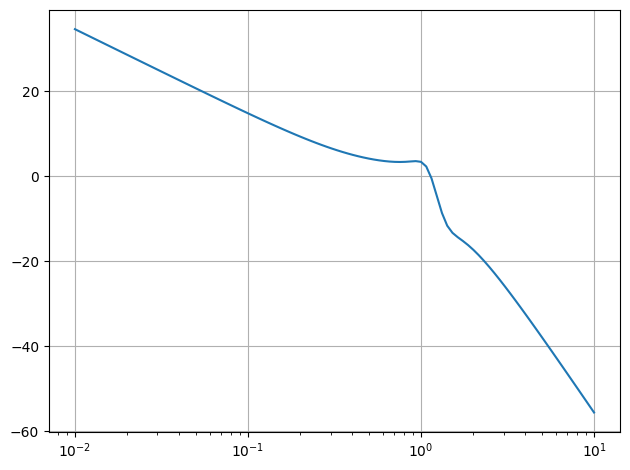

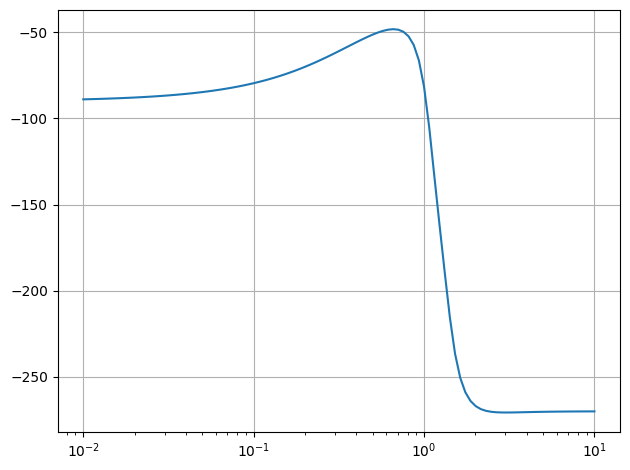

In [35]:
numerador = "4.2*x^3 + 7*x +3.78"
denominador = "2.5*x^6 + 0*x^5 + 1*x^4 + 4.2*x^3 + 7*x"

num =poly_to_tuple(numerador)
den = poly_to_tuple(denominador)

print(num)
print(den)

sys = signal.TransferFunction(num, den)
w, Hdb, phi = signal.bode(sys)

plot_bode(w, Hdb)
plot_bode(w, phi)

Index       0   1   2   3   4

degree      4   3   2   1   0